In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import csv
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import os
import matplotlib.image as mpimg

---
## Step 0: Load The Data

In [2]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/training/train.p'
validation_file= '../data/validation/valid.p'
testing_file = '../data/testing/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = str(len(X_train[0])) + '*' + str(len(X_train[0][0])) + '*' + str(len(X_train[0][0][0]))

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 32*32*3
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

13


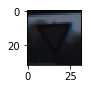

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

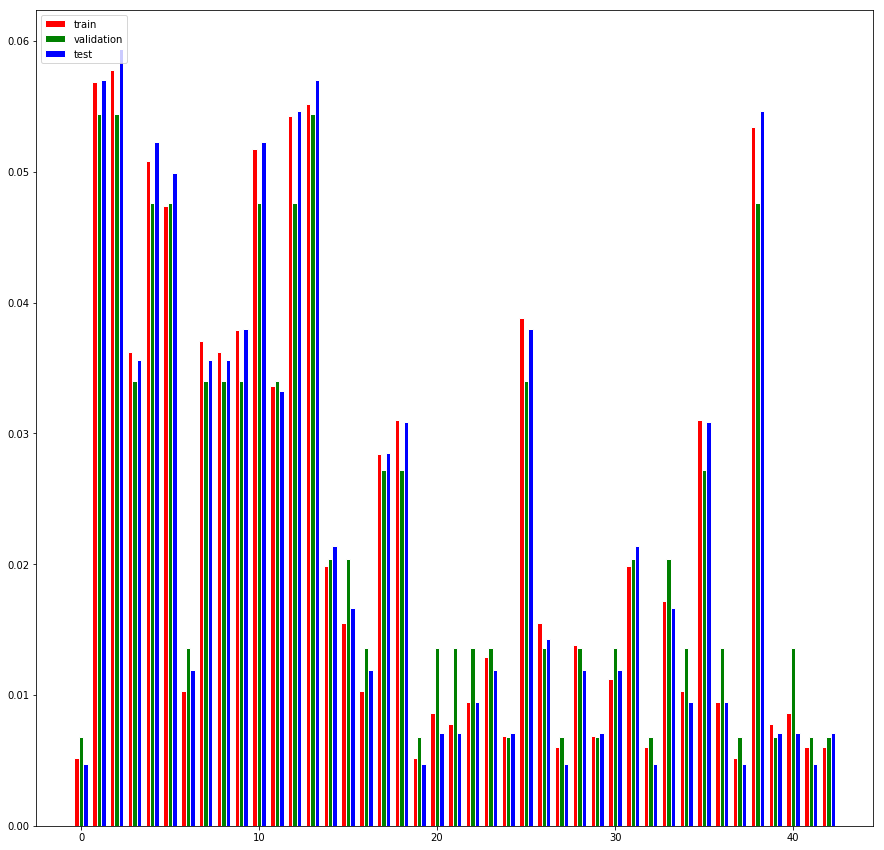

In [5]:
### show the data in picture
def datacount(data):
    number = []
    count = copy.deepcopy(data)
    count.sort()
    count = list(count)
    for i in range(42):
        a = count.index(i+1)-count.index(i)
        number.append(a)
        
    a = len(count)-count.index(42)
    number.append(a)
    return number

signs = np.arange(43)
plt.figure(figsize=(15,15))
percent_train = np.divide(datacount(y_train),len(y_train))
percent_valid = np.divide(datacount(y_valid),len(y_valid))
percent_test = np.divide(datacount(y_test),len(y_test))
plt.bar(signs-0.25, percent_train, width = 0.25, fc = 'r', edgecolor = 'white', label='train', lw=1)
plt.bar(signs, percent_valid, width = 0.25, fc = 'g', edgecolor = 'white', label='validation', lw=1)
plt.bar(signs+0.25, percent_test, width = 0.25, fc = 'b', edgecolor = 'white', label='test', lw=1)
plt.legend(loc="upper left")
# plt.savefig('./examples/data_bar.jpg')
plt.show()

In [6]:
### show the data in table

signames = []

with open('../signnames.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    rows= [row for row in reader]
for i in range(1,len(rows)):
    signames.append(rows[i][1])

print("{0:<7}".format("ClassID"),"{0:<55}".format("SignName"),
      "{0:10}".format("    Training "),"{0:10}".format(" Validation"), "{0:10}".format("    Test"))
for j in range(len(signames)):
    print("{0:<7}".format(signs[j]),'{0:<55}'.format(signames[j]),
      "{0:10.2f}%".format(percent_train[j]*100 ),"{0:10.2f}%".format(percent_valid[j]*100 ),
      "{0:10.2f}%".format(percent_test[j]*100 ))

ClassID SignName                                                    Training   Validation     Test  
0       Speed limit (20km/h)                                          0.52%       0.68%       0.48%
1       Speed limit (30km/h)                                          5.69%       5.44%       5.70%
2       Speed limit (50km/h)                                          5.78%       5.44%       5.94%
3       Speed limit (60km/h)                                          3.62%       3.40%       3.56%
4       Speed limit (70km/h)                                          5.09%       4.76%       5.23%
5       Speed limit (80km/h)                                          4.74%       4.76%       4.99%
6       End of speed limit (80km/h)                                   1.03%       1.36%       1.19%
7       Speed limit (100km/h)                                         3.71%       3.40%       3.56%
8       Speed limit (120km/h)                                         3.62%       3.40%       3.56%

C:\Users\Wyatt\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


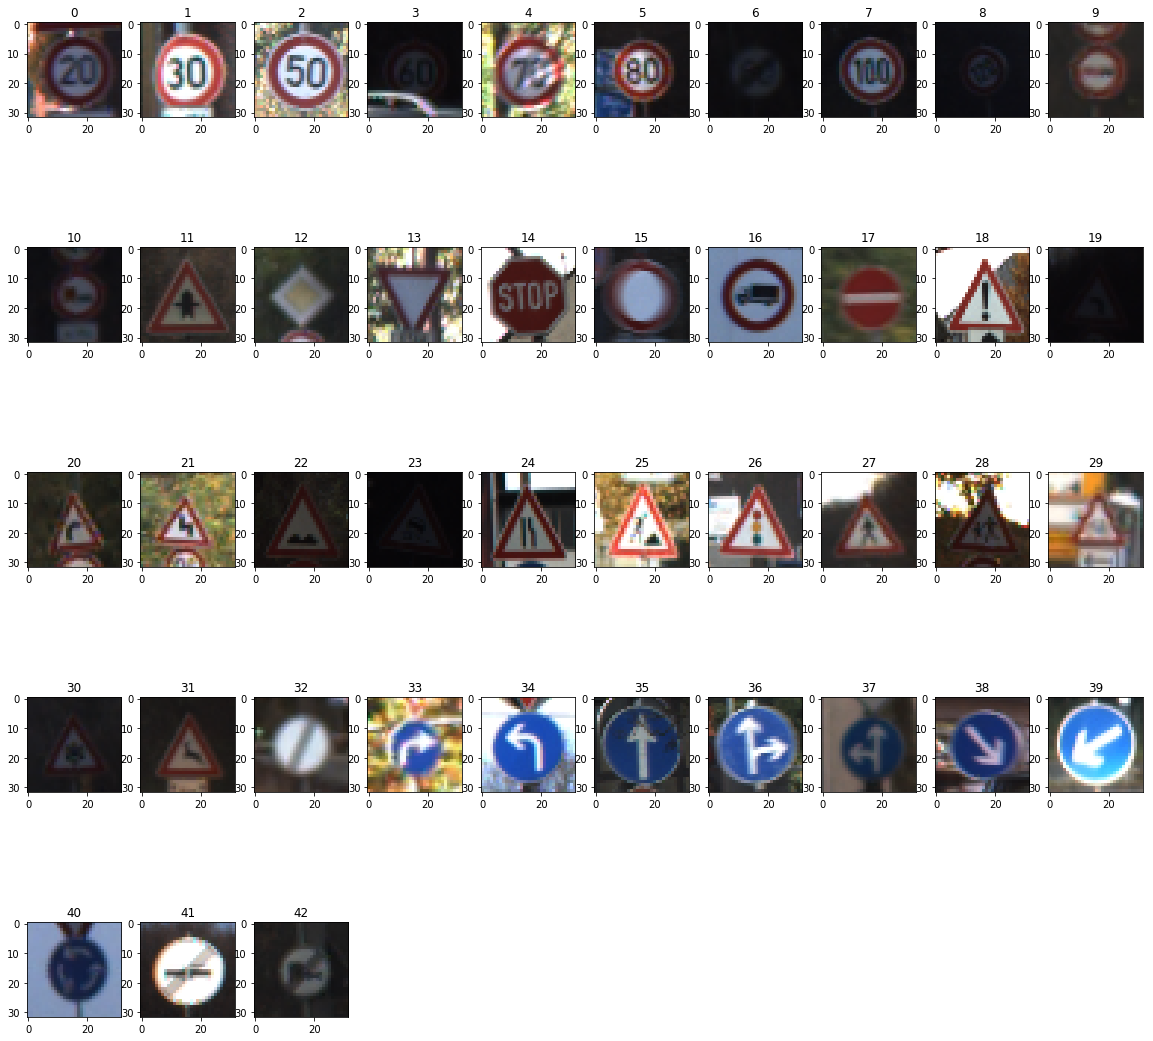

In [7]:
### visualize all the examples

fig = plt.figure(figsize=(20,20))

for i in range(43):
    y = list(y_test)
    index = y.index(i)
    fig.add_subplot(5,10,i+1)
    fig.add_subplot(5,10,i+1).set_title(str(i))
    plt.imshow(X_test[index].squeeze())

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
## I didn't choose to grayscale the picture cause I think the color is also an important clue 
## for classification(speed limit, end of speed limit).

def grayscale(imgset):
    
    imgset = imgset*np.array([0.299, 0.587, 0.114])
    return np.sum(imgset, axis=3, keepdims=True)

# X_train = grayscale(X_train)
# X_valid = grayscale(X_valid)
# X_test = grayscale(X_test)

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# normalized the pixels
X_train = (X_train-128.0)/128.0
X_valid = (X_valid-128.0)/128.0
X_test = (X_test-128.0)/128.0

### Model Architecture

In [10]:
# my AlexNet structure

x = tf.placeholder(tf.float32,(None,32,32,3))
resize = tf.image.resize_images(x, (227, 227))

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1
keep_prob = tf.placeholder(tf.float32,(3))

# Layer 1: Convolutional. Input = 227x227x3. Output = 55x55x96.
conv1_W = tf.Variable(tf.truncated_normal(shape=(11, 11, 3, 96), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(96))
conv1_in   = tf.nn.conv2d(resize, conv1_W, strides=[1, 4, 4, 1], padding='VALID') + conv1_b

# Activation.
layer1 = tf.nn.relu(conv1_in)

# Pooling. Input = 55x55x96. Output = 27x27x96.
conv1 = tf.nn.max_pool(layer1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')

# Layer 2: Convolutional. Input = 27x27x96. Output = 27x27x256.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 96, 256), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(256))
conv2_in   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b

# Activation.
layer2 = tf.nn.relu(conv2_in)

# Pooling. Input = 27x27x256. Output = 13x13x384.
conv2 = tf.nn.max_pool(layer2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')

# Layer 3: Convolutional. Input: 13x13x256. Output: 13x13x96
conv3_w = tf.Variable(tf.truncated_normal(shape=(3, 3, 256, 384), mean = mu, stddev = sigma))
conv3_b = tf.Variable(tf.zeros(384))
conv3_in = tf.nn.conv2d(conv2, conv3_w, strides=[1, 1, 1, 1], padding = "SAME") + conv3_b

# Activation.
layer3 = tf.nn.relu(conv3_in)

# Layer 4: Convolutional. Input: 13x13x384. Output: 13x13x384
conv4_w = tf.Variable(tf.truncated_normal(shape=(3, 3, 384, 384), mean = mu, stddev = sigma))
conv4_b = tf.Variable(tf.zeros(384))
conv4_in = tf.nn.conv2d(layer3, conv4_w, strides=[1, 1, 1, 1], padding = "SAME") + conv4_b

# Activation.
layer4 = tf.nn.relu(conv4_in)

# Layer 5: Convolutional. Input: 13x13x384. Output: 13x13x256
conv5_w = tf.Variable(tf.truncated_normal(shape=(3, 3, 384, 256), mean = mu, stddev = sigma))
conv5_b = tf.Variable(tf.zeros(256))
conv5_in = tf.nn.conv2d(layer4, conv5_w, strides=[1, 1, 1, 1], padding = "SAME") + conv5_b

# Activation.
layer5 = tf.nn.relu(conv5_in)

# Pooling: Input = 13x13x256. Output = 6x6x256
conv3 = tf.nn.max_pool(layer5, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding = "VALID")

# Layer 6: Flatten. Input = 6x6x256. Output = 9216.
fc0   = flatten(conv3)

# Layer 7: Full connection layer. Input = 9216. Output = 4096.
fc1_w = tf.Variable(tf.truncated_normal(shape=(9216, 4096), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(4096))
fc1_in = tf.matmul(fc0, fc1_w) + fc1_b

# Activation.
layer7 = tf.nn.relu(fc1_in)

# Dropout
fc1 = tf.nn.dropout(layer7, keep_prob[0])

# Layer 8: Full connection layer. Input = 4096. Output = 1000.
fc2_w = tf.Variable(tf.truncated_normal(shape=(4096, 1000), mean = mu, stddev = sigma))
fc2_b = tf.Variable(tf.zeros(1000))
fc2_in = tf.matmul(fc1, fc2_w) + fc2_b

# Activation.
layer8 = tf.nn.relu(fc2_in)

# Dropout
fc2 = tf.nn.dropout(layer8, keep_prob[1])

# Layer 9: Full connection layer. Input = 1000. Output = 200.
fc3_w = tf.Variable(tf.truncated_normal(shape=(1000, 200), mean = mu, stddev = sigma))
fc3_b = tf.Variable(tf.zeros(200))
fc3_in = tf.matmul(fc2, fc3_w) + fc3_b

# Activation.
layer9 = tf.nn.relu(fc3_in)

# Dropout
fc3 = tf.nn.dropout(layer9, keep_prob[1])

# Layer 10: Full connection layer. Input = 200. Output = 43.
fc4_w = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
fc4_b = tf.Variable(tf.zeros(43))
fc4_in = tf.matmul(fc3, fc4_w) + fc4_b

# Activation.
layer10 = tf.nn.relu(fc4_in)

# Dropout
logits = tf.nn.dropout(layer10, keep_prob[1])


In [11]:
# tensorflow parameters
epoches = 50
batch_size = 128

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

In [13]:
## Parameters operation

y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)

learning_rate = 0.001

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

saver = tf.train.Saver()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [14]:
## Evaluation accuracy

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: [1,1,1]})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
# training
# when the accuracy is high, I want to make the learning rate smaller.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('Training ......')
    print()
    max_acc = 0
    
    for i in range(epoches):
        X_train,y_train = shuffle(X_train,y_train) # shuffle the data
        for offset in range(0,n_train,batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end],y_train[offset:end]
            sess.run(training_operation,feed_dict = {x:batch_x, y:batch_y, keep_prob: [0.5,0.5,0.5]})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        if(max_acc <= validation_accuracy):
            max_acc = validation_accuracy
            saver.save(sess, './result')
            print("Model saved with accuracy:", max_acc)
        if i%5 ==0:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
#             print('Can be better, continue training...')
            print()
    
    saver.save(sess, './result')
    print("maximal accuracy is:", max_acc)
    print("End training")

ResourceExhaustedError: OOM when allocating tensor with shape[384] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Variable_7/Adam_1/Assign = Assign[T=DT_FLOAT, _class=["loc:@Variable_7/Adam/Assign"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable_7/Adam_1, Variable_7/Adam/Initializer/zeros)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'Variable_7/Adam_1/Assign', defined at:
  File "C:\Users\Wyatt\Miniconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Wyatt\Miniconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Wyatt\Miniconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\Wyatt\Miniconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\Wyatt\Miniconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-6ccc6c62102a>", line 11, in <module>
    training_operation = optimizer.minimize(loss_operation)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\training\optimizer.py", line 424, in minimize
    name=name)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\training\optimizer.py", line 600, in apply_gradients
    self._create_slots(var_list)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\training\adam.py", line 132, in _create_slots
    self._zeros_slot(v, "v", self._name)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\training\optimizer.py", line 1150, in _zeros_slot
    new_slot_variable = slot_creator.create_zeros_slot(var, op_name)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\training\slot_creator.py", line 181, in create_zeros_slot
    colocate_with_primary=colocate_with_primary)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\training\slot_creator.py", line 155, in create_slot_with_initializer
    dtype)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\training\slot_creator.py", line 65, in _create_slot_var
    validate_shape=validate_shape)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1317, in get_variable
    constraint=constraint)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1079, in get_variable
    constraint=constraint)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 425, in get_variable
    constraint=constraint)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 394, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 786, in _get_single_variable
    use_resource=use_resource)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2220, in variable
    use_resource=use_resource)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2210, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2193, in default_variable_creator
    constraint=constraint)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 235, in __init__
    constraint=constraint)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 387, in _init_from_args
    validate_shape=validate_shape).op
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\state_ops.py", line 283, in assign
    validate_shape=validate_shape)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 63, in assign
    use_locking=use_locking, name=name)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\Wyatt\Miniconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[384] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Variable_7/Adam_1/Assign = Assign[T=DT_FLOAT, _class=["loc:@Variable_7/Adam/Assign"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable_7/Adam_1, Variable_7/Adam/Initializer/zeros)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
### Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    train_accuracy = evaluate(X_train,y_train)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Train Accuracy = {:.3f}".format(train_accuracy))

In [ ]:
### calculate the precision and recall

number_test = datacount(y_test)
def precion_and_recall(questions,proves):
    calcu = [[0,0,0,i] for i in range(43)]
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        prediction = []
        for offset in range(0, len(questions), batch_size):
            end = offset + batch_size
            x_batch = questions[offset:end]
            prediction.extend(sess.run(tf.argmax(logits,1),feed_dict={x:x_batch, keep_prob: [1.,1.,1.]}))
            
    for i in range(len(prediction)):
        if proves[i] == prediction[i]:
            calcu[proves[i]][1] += 1 
        else:
            calcu[proves[i]][0] += 1
            calcu[prediction[i]][2] += 1
    ret = calcu
    for j in range(len(calcu)):
        ret[j][0] = calcu[j][1]/(calcu[j][1]+calcu[j][0])  ### precision
        ret[j][1] = calcu[j][1]/(calcu[j][1]+calcu[j][2])  ### recall
        ret[j][2] = ret[j][0]*ret[j][1]*2/(ret[j][1]+ret[j][0])  ### F
    return ret

pre_and_re = precion_and_recall(X_test,y_test)
pre_and_re.sort(key=lambda x:x[2])

print("{0:<7}".format("ClassID"),"{0:<55}".format("SignName"),
      "    {0:10}".format("Precision"),"  {0:10}".format("Recall"), "   {0:10}".format("F"))
for j in range(len(pre_and_re)):
    print("{0:<7}".format(pre_and_re[j][3]),'{0:<55}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

files = os.listdir('./download_picture')
fig = plt.figure(figsize=(20,10))
index = 0
for file in files:
    if '.jpg' in file and '_' not in file:
        fig.add_subplot(2,6,index+1)
        plt.imshow(mpimg.imread('download_picture/' + file))
        title = file
        title = title.strip('.jpg')
        fig.add_subplot(2,6,index+1).set_title(title)
        index += 1

In [ ]:
### resize the pictures and read the pictures
files = os.listdir('./download_picture')

test = []
answers = []

for file in files:
    if '.jpg' in file and '_' not in file:
        answer = file
        answer = answer.strip('.jpg')
        answer = int(answer)
        
        fig = plt.figure(figsize=(5,5))
        mat1 = mpimg.imread('download_picture/' + file)
        mat2 = cv2.resize(mat1,(32,32))
        fig.add_subplot(1,1,1).set_xlabel(str(answer)+': ' + signames[answer])
        plt.imshow(mat2)
        plt.savefig('download_picture/preprocess_'+file)
        
        answers.append(answer)
        test.append(mat2)

### preprocess
test = np.array(test)
#test = grayscale(test)
test = (test-128.0)/128.0

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predict = sess.run(tf.argmax(logits,1),feed_dict={x:test, keep_prob: [1.,1.,1.]})
    correct = sess.run(correct_prediction,feed_dict={x:test, y:answers, keep_prob:[1.,1.,1.]})
    
print("{0:<7}".format("Answer"),"{0:<7}  ".format("Predict"),"{0:<7}".format("judge"))
for j in range(len(predict)):
    print("{0:<7}".format(answers[j]),'{0:<7}  '.format(predict[j]),str(correct[j]))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 6 new images. 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
        
    accuracy = sess.run(accuracy_operation, feed_dict={x: test, y: answers, keep_prob:[1.,1.,1.]})
    print("Accuracy = {:.3f}".format(accuracy)) 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))    
    for i in range(len(test)):
        w = None
        w = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5),feed_dict={x:[test[i]],keep_prob:[1.,1.,1.]})
        print('top 5: ',w)
        name = []
        for j in range(len(w[1][0])):
            name.append(signames[w[1][0][j]])
            name[j] = name[j] + ', ID: ' + str(w[1][0][j])
        label = range(0,15,3)
        plt.figure(figsize=(10,10))
        plt.bar(label, w[0][0], width = 3, fc = 'g', edgecolor = 'white', label='validation', lw=1)
        plt.xticks(label ,name, rotation=15)
        plt.title('Answer: ' + signames[answers[i]] + ', ID: ' + str(answers[i]))
        for a,b in zip(label,w[0][0]):  
            plt.text(a, b+0.005, '%e' % b, ha='center', va= 'bottom',fontsize=11)
        plt.savefig('./download_picture/softmax_' + str(answers[i]) + '.jpg')
        plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(title,image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    sess = tf.Session()
    saver = tf.train.Saver()
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        if plt_num == 6:
            plt.subplot(2,3, featuremap+1) # sets the number of feature maps to show on each row and column
        if plt_num == 16:
            plt.subplot(4,4, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title(title + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:

with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    for a in range(len(test)):
        print(answers[a])
        print('layer1')
        outputFeatureMap(signames[answers[a]]+' ',[test[a]],layer1,plt_num=6)
        plt.savefig('./visualization/'+str(answers[a])+'_layer1'+'.jpg')
        plt.show()
        print('layer2')
        outputFeatureMap(signames[answers[a]]+' ',[test[a]],layer2,plt_num=16)
        plt.savefig('./visualization/'+str(answers[a])+'_layer2'+'.jpg')
        plt.show()